# Learning Objectives:

By the end of this session, participants should be able to:

* Use Panda’s DataFrame for basic data wrangling
* Use Scipy/Numpy to conduct descriptive stats and t-test
* Create a simple visualization of data using Seaborn
* Describe how API works
* Use BeautifulSoup to scrape data from a web page
* Use NLTK for basic data pre-processing and word count
* Describe how to use GitHub publish their code repository


In [1]:
pip install nltk

In [2]:
# import the necessary packages
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
import requests as rq 
import json
import re

## Dataframe 101 (60 minutes)
- reading from csv
- describe and info
- rename columns
- slicing data
- filtering data, group by
- counting values
- simple plots
- deriving new columns, dropping columns

In [ ]:
# reading from CSV
# youth-survey.csv consists of responses from youths (15-30 years old) in Czech Republic 
data = pd.read_csv('youth-survey.csv')
data

### Retrieve basic info about the dataframe

In [ ]:
# Use the DataFrame.info() method to find out more about a dataframe.
data.info()

In [ ]:
# The DataFrame.columns variable stores information about the dataframe’s columns.
# This one doesn't have parentheses because it's not a function, but a 
# variable inside the dataframe object (member variable)

data.columns

In [ ]:
# quickly get the number of rows and columns of the dataframe

data.shape

In [ ]:
# DataFrame.describe() gets the summary statistics of the columns that have numerical data. 
# All other columns are ignored, unless you use the argument include='all'.

data.describe()

### Renaming columns

In [ ]:
# Sometimes column names need to be renamed to mae it easier for us
# rename columns to be all lowercaps with no whitespace (replace whitespace with hyphen)
# rename them to something more meaningful

data.rename(columns = {
    "Energy levels": "energy-levels",
    "Internet usage": "internet-usage",
    "Loneliness": "loneliness",
    "left - right" : "dominant-hand",
    "Village - town": "locality"
}, inplace=True)

data.columns

### Selecting a subset of dataframe ("slicing")

In [ ]:
# Selecting a subset ("slicing") 
# get the age of participants
data["age"]

In [ ]:
# Describe just a column
data["age"].describe()

In [ ]:
# get the height and age of participants
data[["height", "age"]]

In [ ]:
# Describe the two columns
data[["height", "age"]].describe()

***Try Yourself:***
* Get the loneliness, happiness, and energy-levels columns

### Filtering the data to fit specified criteria

In [ ]:
# Filtering: Get all data from participants above 18 years old
criteria = data["age"] > 18
data_above_18 = data[criteria]

data_above_18.head(10)

In [ ]:
# Get data from Female participants above 18 years old
criteria = (data["age"] > 18) & (data["gender"] == "female")
data_female_18 = data[criteria]

data_female_18.head(10)

In [ ]:
# get participants that stated their age
criteria = data["age"].notna()
data_age_known = data[criteria]

data_age_known.shape

***Try Yourself:***
* Get data from people whose happiness ratings are >= 3 or loneliness rating <= 3

In [ ]:
# Even more granular filtering:
# get the internet-usage information of city-dwelling participants

# we can of course do it in two steps: filter the row based on the locality, and then slice the internet-usage column
# using .loc, we can filter both criteria at one go

criteria = (data["locality"] == "city")
city_dwellers_internet_usage = data.loc[criteria, "internet-usage"]

city_dwellers_internet_usage.head(10)

In [ ]:
# retrieve based on index number instead of column names or row values
# retrieve the first 3 rows only

data[0:3]

In [ ]:
# retrieve "lying" values (2nd column) of row 5 to 10
# use .iloc to perform this filtering+slicing in one go

data.iloc[5:11, 1]

***Try Yourself:***
* Get the happiness and loneliness rating of participants with more than 1 siblings

### Updating values

In [ ]:
# we can also update the values in dataframe, especially for the empty ones
# update the missing siblings value to 0
# inplace = True so that the changes are applied to the dataframe itself

data["siblings"].fillna(0, inplace = True)

***Try Yourself:***
* Update the missing values in gender to "No Gender"
* Update the the values "left handed" to "l" and right handed to "r" (hint: you can use .loc for this!)

### Counting and Sorting Values

In [ ]:
# Find out how many participants are female or male
data["gender"].value_counts()

In [ ]:
# Find out how many participants are female or male from villages and towns
data[["gender", "locality"]].value_counts()

In [ ]:
# sort the age of participants from youngest to oldest
data.sort_values(by='age', inplace=True)
data.head(15)

***Try Yourself:***
* Include the NaN value when counting the number of female and male participants
* Sort participants based on happiness rating, from highest to lowest

### Creating new column based on other columns, dropping columns

In [ ]:
# create a new column called "height-in-m", deriving from the "height" column
data["height-in-m"] = data["height"] / 100 # no need to use loops as dataframe will perform this automatically to all values in the column
data.head(10)

In [ ]:
# drop a column
data.drop(columns=["height-in-m"], inplace=True)
# inplace=True means apply the change to the current dataframe

#check the columns now
data.columns

### Simple plots with Seaborn

In [ ]:
sns.set_theme(style="ticks", color_codes=True)

# create a histogram for Energy Levels data
sns.displot(data["energy-levels"], discrete=True, shrink=.8)

In [ ]:
# you can also create a scatterplot
sns.stripplot(x="punctuality", y="age", data=data, hue="punctuality")

In [ ]:
sns.lmplot(x="age", y="happiness", data=data);

In [ ]:
sns.lmplot(x="age", y="happiness", hue="locality", data=data);

## Stats with Dataframe

- mean, mode, median, std, etc
- correlation

In [ ]:
# Calculate the average age of the participant
data["age"].mean()

In [ ]:
# Calculate the median age of the participant
data["age"].median()

In [ ]:
# What's the most common age among participants?
data["age"].mode()

In [ ]:
# what's the average age of female and male participants?
grouped_data = data.groupby(by=["gender"]).mean()
grouped_data["age"]

***Try Yourself:***
* Find out the average loneliness rating of participants grouped by their gender and locality

In [ ]:
#### inferential stats ####
# are there any relationship between these two variables?
# let's check the value for pearson's r
pearson = data["happiness"].corr(data["age"])
pearson

In [ ]:
# to get the p-value, we can use scipy's pearsonr function
from scipy import stats

# the data has some NaN values, let's replace them with 0
data["happiness"].fillna(0, inplace = True)
data["age"].fillna(0, inplace = True)

pearson_coef = stats.pearsonr(data["happiness"], data["age"])
pearson_coef
# first value is the coefficient, and the second value is the p-value

In [ ]:
# we can also quickly calculate the correlation coefficient between numerical variables
# and keep them in a matrix
corr_matrix = data.corr()
corr_matrix

In [ ]:
# show the matrix in a heatmap using seaborn
sns.heatmap(corr_matrix)

## API and Web scraping (50 Mins + 5 mins break)

* API calls in Python (20 Minutes)
** URL for CORE API: https://api.core.ac.uk/v3/search/works/?q=singapore+language.code:en+yearPublished%3E2015&api_key=mxjh1gYiMCXEvTJlcs2tVIHGFAZ3ndQS
* Simple web-scraping (30 Minutes)

### Use CORE API to retrieve articles in CORE about Singapore, published after 2015.

* brief lecture on anatomy of API --> e.g. for retrieving a single paper using its DOI
* how to read API documentation

In [ ]:
# Read the apikey and prepare the api call
with open("apikey.txt") as f:
    api_key = f.read()
    
api_call = "https://api.core.ac.uk/v3/search/works/?q=singapore+language.code:en+yearPublished%3E2015&api_key=" + api_key

In [ ]:
# call the API take a peek on the response in JSON format
core_response = rq.get(api_call)

# check the status code
core_response.status_code

In [ ]:
# Tell python to "format" this string of text as JSON. 
response_json = core_response.json()

# Python will then save the info into what we call dictionary, which can then be loaded into a dataframe
# note that if the structure of dictionary is a bit complicated, you may need to unravel it first. 
response_json

### Extracting fulltext from a single HTML page

Link to article used in this notebook: https://crl.acrl.org/index.php/crl/article/view/24753/32576

In [3]:
url = "https://crl.acrl.org/index.php/crl/article/view/24753/32576"
markup = rq.get(url).text

In [4]:
# parse content
soup = BeautifulSoup(markup, 'lxml') # with lxml parser
# soup = BeautifulSoup(markup, 'html.parser') # with html5 parser

In [ ]:
# full text content is located inside a "div" element inside div#content. 
# it's always placed as the first child and the only div without class
# the CSS selector below will only work for ACRL full-text article pages.
content = soup.select("div#content > div:not(.block)")
print(content)

In [ ]:
# go through the tags contained inside the retrieved div and apply the checks, etc.
# print out the result
fulltext = ""
for div in content:
    for tag in div:
        fulltext += tag.text + "\n" #save everything inside this div regardless of tag type
        if tag.name == "h1":
            print("Title: ", tag.text)
        elif tag.name == "p" or tag.name == "ul":
            print("Text:", tag.text)
        elif tag.name == "h2" or tag.name == "h3": 
            print("Headings:", tag.text)
        elif tag.name == "div":
            print("Tables:", tag.text)

In [8]:
# save to file
txt_file = open("crl_fulltext.txt","w", encoding='utf-8')
txt_file.write(fulltext)
txt_file.close() #to change file access modes

Brief lecture on:
* advantages of using API over webscraping
* available APIs to use (show API guide)

## Text analysis 101 (30 mins)

- The pre-processing
- Descriptive text analysis: WordCount

In [9]:
# load the JSON data, containing approx 200 articles from CORE
core_df = pd.read_json("core_articles.json")
core_df.head(5)

,acceptedDate,arxivId,authors,citationCount,contributors,outputs,createdDate,dataProviders,depositedDate,abstract,...,oaiIds,publishedDate,publisher,pubmedId,references,sourceFulltextUrls,updatedDate,yearPublished,journals,links
0,None,NaN,"[{'name': 'Kinasih , Agni Kusti'}]",NaN,[],[https://api.core.ac.uk/v3/outputs/87084331],2017-10-12T11:59:02,[https://api.core.ac.uk/v3/data-providers/379],None,Singapore Colloquial English (SCE/ Singlish) i...,...,[oai:generic.eprints.org:55621/core379],2016-08-09T00:00:00,,NaN,[],[http://eprints.undip.ac.id/55621/1/PROCEEDING...,2021-12-31T16:20:17,2016,[],"[{'type': 'download', 'url': 'https://core.ac...."
1,None,NaN,"[{'name': 'Bertosa, Brian'}]",NaN,[],[https://api.core.ac.uk/v3/outputs/232454203],2019-10-29T10:05:58,[https://api.core.ac.uk/v3/data-providers/3375],None,"Review of The Men Who Lost Singapore, 1938-19...",...,[oai:scholars.wlu.ca:cmh-1979],2019-10-02T20:17:33,Scholars Commons @ Laurier,NaN,[],[https://scholars.wlu.ca/cgi/viewcontent.cgi?a...,2021-12-10T21:41:09,2019,[],"[{'type': 'download', 'url': 'https://core.ac...."
2,2018-02-22T00:00:00,1708.0876,"[{'name': 'Dev, Soumyabrata'}, {'name': 'Manan...",NaN,[],[https://api.core.ac.uk/v3/outputs/93939974],2017-10-17T02:39:08,[https://api.core.ac.uk/v3/data-providers/144],2017-11-01T00:00:00,The estimation of total solar irradiance falli...,...,[oai:arxiv.org:1708.08760],2017-08-24T00:00:00,,NaN,[],[http://arxiv.org/abs/1708.08760],2019-06-03T18:15:02,2017,[],"[{'type': 'download', 'url': 'http://arxiv.org..."
3,None,NaN,"[{'name': 'Lee, Young Gi'}]",NaN,[],[https://api.core.ac.uk/v3/outputs/215447469],2019-07-09T15:33:14,[https://api.core.ac.uk/v3/data-providers/2295],None,The gaming governance system in Singapore is a...,...,[oai:digitalscholarship.unlv.edu:thesesdissert...,2017-12-01T08:00:00,Digital Scholarship@UNLV,NaN,[],[https://digitalscholarship.unlv.edu/cgi/viewc...,2021-08-19T21:13:44,2017,[],"[{'type': 'download', 'url': 'https://digitals..."
4,None,NaN,"[{'name': 'Bellows, Thomas J'}]",NaN,[],[https://api.core.ac.uk/v3/outputs/212819618],2019-07-09T10:36:19,[https://api.core.ac.uk/v3/data-providers/1283],None,None,...,[oai:digitalcommons.law.umaryland.edu:mscas-1235],2017-01-01T08:00:00,DigitalCommons@UM Carey Law,NaN,[],[https://digitalcommons.law.umaryland.edu/cgi/...,2021-12-25T12:32:14,2017,[],"[{'type': 'download', 'url': 'https://core.ac...."


In [10]:
# We are not interested in all the columns, so let's get only the necessary columns
metadata_df = core_df[['createdDate', 'title', 'abstract', 'fullText', 'yearPublished']]
metadata_df

,createdDate,title,abstract,fullText,yearPublished
0,2017-10-12T11:59:02,LINGUISTIC FEATURES OF SINGAPORE COLLOQUIAL EN...,Singapore Colloquial English (SCE/ Singlish) i...,LANGUAGE MAINTENANCE AND SHIFT\n(LAMAS) 6\nAug...,2016
1,2019-10-29T10:05:58,"Review of The Men Who Lost Singapore, 1938-19...","Review of The Men Who Lost Singapore, 1938-19...",Canadian Military History\nVolume 28 | Issue 2...,2019
2,2017-10-17T02:39:08,Study of Clear Sky Models for Singapore,The estimation of total solar irradiance falli...,1Study of Clear Sky Models for Singapore\nSoum...,2017
3,2019-07-09T15:33:14,The “Singapore Model” in Gaming: Applications ...,The gaming governance system in Singapore is a...,"UNLV Theses, Dissertations, Professional Paper...",2017
4,2019-07-09T10:36:19,Singapore: A Story Unfolding,None,SINGAPORE: A STORY UNFOLDING \nThomas J. Bello...,2017
...,...,...,...,...,...
195,2013-07-18T09:45:01,Conceptual design and multidisciplinary optimi...,Solar-powered aircraft is propelled by a photo...,A PROBLEM-BASED LEARNING APPROACH IN \nTEACHIN...,2021
196,2020-01-24T00:46:26,Using Adherence-Contingent Rebates on Chronic ...,Background: Poor adherence to medications is a...,Vol.:(0123456789)\nApplied Health Economics an...,2019
197,2013-07-18T09:45:02,The effectiveness of Neuro-Linguistic Programm...,Neuro-Linguistic Programming (NLP) was develop...,IT LODGE PLANNER \nPROJECT MANAGEMENT BEYOND C...,2020
198,2019-01-31T21:09:18,Twin-tunnelling-induced changes to clay stiffness,With urban tunnel construction growing worldwi...,"\nCity, University of London Ins...",2018


In [12]:
# import the necessary packages
import nltk
from nltk import word_tokenize #tokenizer
from nltk.corpus import stopwords #stopwords
from nltk.stem import WordNetLemmatizer #lemmatizer
from nltk.probability import FreqDist #to count words

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bellar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bellar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bellar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Goal: create a word cloud of the corpus to get an overview of the theme. Let's use the abstract for this exercise.**

Preprocessing steps:
* remove punctuations (remove non-alphanumeric characters)
* convert to lowercase
* tokenize the words
* lemmatize the words
* remove stopwords

In [ ]:
all_abstract = "" # empty string to hold all of the abstracts in one variable

# combine all the abstract contents into one string variable
# while combining, do step #1 remove non-alphanumeric characters
for abstract in metadata_df["abstract"]:
    if abstract:
        temp_string = re.sub('[^a-zA-Z0-9]', ' ', str(abstract)) # cleanup the text from non alphanumeric characters.
        all_abstract += str(temp_string)  #append the abstract content to all_abstract
        
all_abstract

In [ ]:
# Step #2 convert to lowercase
all_abstract = all_abstract.lower()
all_abstract

In [ ]:
# Step #3 tokenize the words with NLTK's word_tokenize
tokenized_abstract = word_tokenize(all_abstract)
tokenized_abstract

In [ ]:
# Step #4 lemmatize the words and Step #5 remove stopwords

# prepare an empty list to hold all the filtered words
filtered_abstract = []

#initiate the lemmatizer
wnl = WordNetLemmatizer()

#initiate list of stopwords
stop_words = set(stopwords.words("english"))
#update stopwords to also include singapore
stop_words.update(["singapore"])

for word in tokenized_abstract:
    #lemmatize the word to its dictionary form
    word = wnl.lemmatize(word)
    
    #check if it's part of the stop_words
    if word not in stop_words:
        #extra checks if it's alphabetical and not a numeric word
        if word.isalpha():
            #if yes, add this word to the list of filtered_abstract
            filtered_abstract.append(word)
            
filtered_abstract

### Visualizing the result through frequncy list or word cloud

In [19]:
# Get the exact count of occurence of the words using nltk's FreqDist
fdist = FreqDist(filtered_abstract)
print("Top 50 most used words in the abstract: \n")

fdist.most_common(50)

Top 50 most used words in the abstract: 



[('wa', 121),
 ('system', 81),
 ('study', 80),
 ('research', 71),
 ('energy', 64),
 ('analysis', 63),
 ('ha', 63),
 ('state', 63),
 ('based', 52),
 ('country', 52),
 ('using', 50),
 ('two', 50),
 ('model', 49),
 ('result', 47),
 ('time', 47),
 ('data', 42),
 ('used', 41),
 ('one', 40),
 ('malaysia', 39),
 ('indonesia', 39),
 ('high', 38),
 ('development', 37),
 ('project', 37),
 ('paper', 36),
 ('national', 36),
 ('first', 36),
 ('use', 35),
 ('economic', 35),
 ('also', 33),
 ('level', 33),
 ('international', 32),
 ('cost', 32),
 ('method', 31),
 ('education', 30),
 ('world', 30),
 ('hsr', 30),
 ('show', 30),
 ('comment', 29),
 ('different', 29),
 ('field', 28),
 ('theory', 28),
 ('service', 27),
 ('three', 26),
 ('people', 26),
 ('university', 26),
 ('spin', 26),
 ('group', 25),
 ('language', 24),
 ('many', 24),
 ('structure', 24)]

In [ ]:
# IF ON WINDOWS: download the following pre-build "wheel" file from https://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud 
# and use the following pip command

pip install wordcloud-1.8.1-cp39-cp39-win_amd64.whl

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

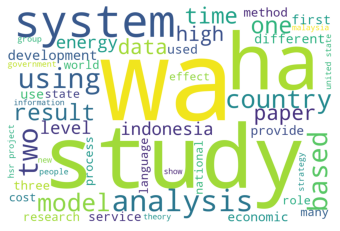

In [20]:
# prepare the list of string
text = " ".join(filtered_abstract)

word_cloud = WordCloud(background_color = 'white', max_words=50, width=1200, height=800)
word_cloud.generate(text)

plt.figure()
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

Based on the result, you may need to adjust the stopwords to get more meaningful wordclouds

***Try Yourself:***
* Do the pre-processing on the full text instead of abstract. Do you get a different list of words?
* Create a word cloud of papers published in 2016 vs 2017. Are there any differences?